Creating and using a random forest with n estimators is fairly straight forward:  
- 1. Create n subsets of your training data. This is called bootstrapping
- 2. Create n trees and and each train them on one set of the bootstraped data. The reasoning behind this is that we hope the trees are uncorrelated
- 3. On a query let each tree make predictions. Final prediction is the majority prediction of all trees


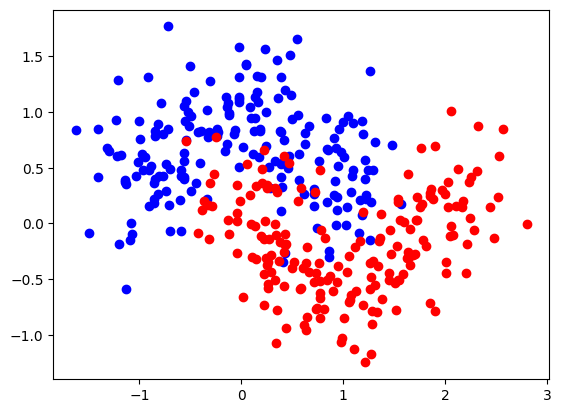

In [1]:
%matplotlib inline
from statistics import mode 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X_train[:,0][y_train==0], X_train[:,1][y_train==0], color="b")
plt.scatter(X_train[:,0][y_train==1], X_train[:,1][y_train==1], color="r")

plt.show()

In [2]:
class RandomForestClassifier:
    def __init__(self, n_trees,  max_depth=None, max_features=None, bagging_size=0.6, random_seed=42):
        self.bagging_size = bagging_size
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.max_features = max_features
        np.random.seed(random_seed)
        self.forest = []
    
    def fit(self, data, labels):
        bootstrapped_data, bootstrapped_labels = self.create_bootstrapped_dataset(data, labels)
        for i in range(self.n_trees):
            # create trees and train them on bootstrapped data
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(bootstrapped_data[i], bootstrapped_labels[i])
            self.forest.append(tree)
            
    def create_bootstrapped_dataset(self, data, labels):
        # create self.n_trees random subsets of training data data. Size of each subset is determined by self.bagging_size
        bootstrp_data = []
        bootstrp_labels = []
        idx = np.random.randint(data.shape[0], size=(self.n_trees, int(data.shape[0]*self.bagging_size)))
        for i in range(self.n_trees):
            bootstrp_data.append(data[idx[i],:])
            bootstrp_labels.append(labels[idx[i]])
        return bootstrp_data, bootstrp_labels
        
    def predict(self, samples):
        # let all trees make predictions
        predictions = np.array([tree.predict(samples) for tree in self.forest]).T
        
        ret = []
        for pred in predictions:
            # final prediction = majority vote of trees
            a = np.argmax(np.bincount(pred))
            ret.append(a)
        
        return np.array(ret)
        
        
            
clf = RandomForestClassifier(n_trees=10, max_depth=None, max_features=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.904
